In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [3]:
col=df.columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [9]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [10]:
trf=ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer', imputer2, ['Fare'])
], remainder='passthrough')

In [11]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer', SimpleImputer(), ['Fare'])])

In [12]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [13]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

In [14]:
df1 = pd.DataFrame(X_train, columns=["Age", "Fare","Survived"])

In [15]:
df1.head(5)

,Age,Fare,Survived
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0


In [16]:
df1.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [17]:
df2 = pd.DataFrame(X_test, columns=["Age", "Fare","Survived"])

In [18]:
df2.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [19]:
df3=pd.concat([df1,df2])

In [21]:
print(df3.shape)
df3.isnull().sum()

(891, 3)


Age         0
Fare        0
Survived    0
dtype: int64

In [22]:
print(df.shape)
df.isnull().sum()

(891, 4)


Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [24]:
import seaborn as sns

C:\Users\tushe\AppData\Local\Temp\ipykernel_15448\1471550708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], color='red')
C:\Users\tushe\AppData\Local\Temp\ipykernel_15448\1471550708.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Age'])


<Axes: xlabel='Age', ylabel='Density'>

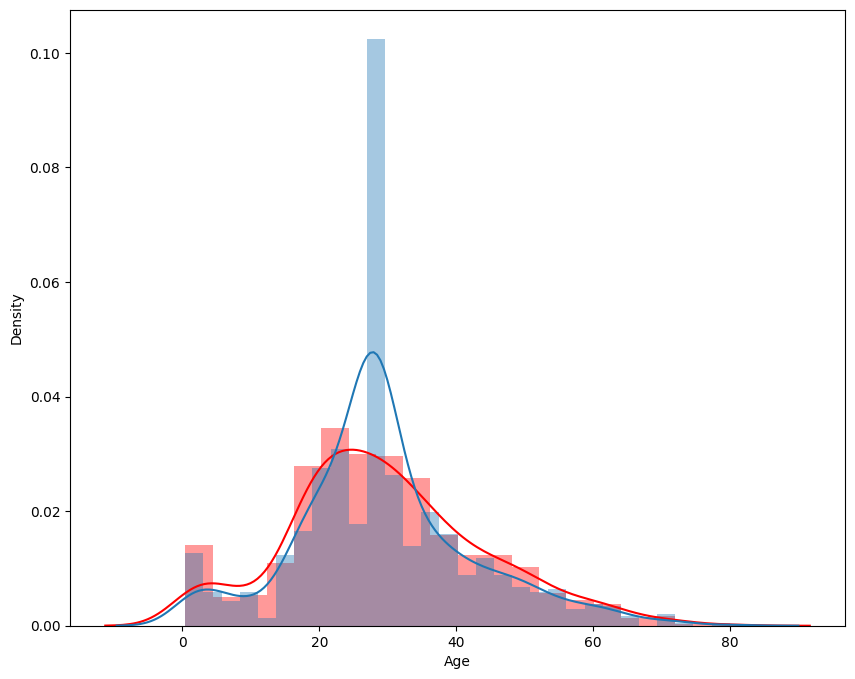

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'], color='red')
sns.distplot(df3['Age'])

C:\Users\tushe\AppData\Local\Temp\ipykernel_15448\3326338028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], color='red')
C:\Users\tushe\AppData\Local\Temp\ipykernel_15448\3326338028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

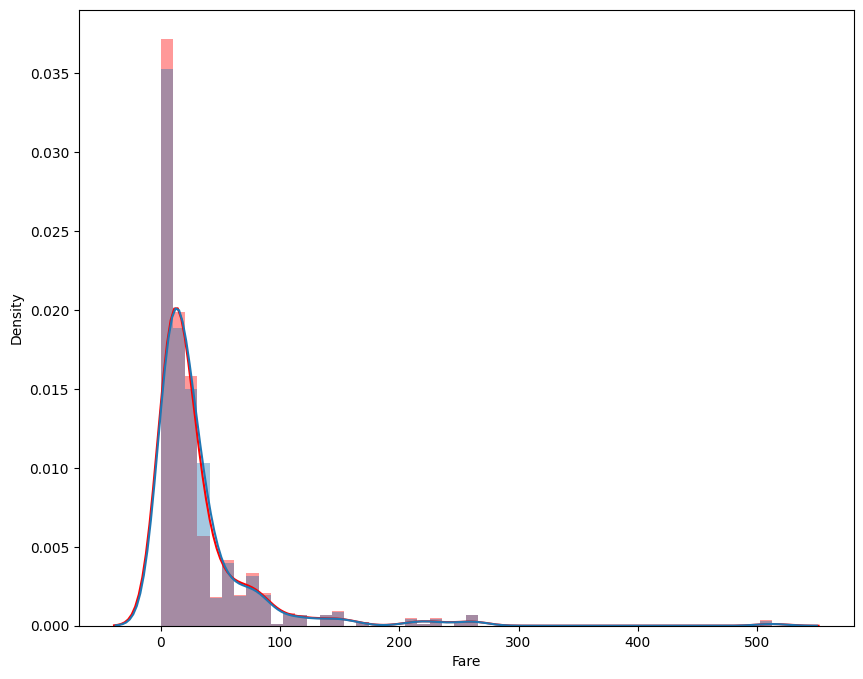

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(df['Fare'], color='red')
sns.distplot(df3['Fare'])

# For Arbitrary

In [29]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)